In [197]:
import os
import statistics
import time
#from imblearn.over_sampling import *
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest, AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score, recall_score
from sklearn.preprocessing import RobustScaler, MinMaxScaler, QuantileTransformer, StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
# import umap
from sklearn import tree
#import graphviz

from keras.models import Sequential, load_model
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Input, concatenate, LSTM
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from keras.models import Model

import warnings

In [198]:
def extract_features(df, n_samples_device,feat_list):
    df_X = df.iloc[:, feat_list]
    df_Y = df.iloc[:, -1:]
    

    final_df = pd.DataFrame()

    for n in range(0, df_X.shape[0] // n_samples_device):
        df_X_selec = df_X[n * n_samples_device:n * n_samples_device + n_samples_device]
        df_Y_selec = df_Y[n * n_samples_device:n * n_samples_device + n_samples_device]



        window = initial_window

        temp_df = pd.DataFrame()
        temp_df = temp_df.append(df_Y_selec)
        for c in range(n_recursive_windows):  # (df_X_selec.shape[1]): #(1):
            for f in range(df_X_selec.shape[1]):
                feat=df_X_selec.columns[f]
                df_X_selec_c = df_X_selec.iloc[:, f]
                temp_df["mean_" + str(window) + "_" + str(feat)] = df_X_selec_c.rolling(window).mean()
                temp_df["min_" + str(window) + "_" + str(feat)] = df_X_selec_c.rolling(window).min()
                temp_df["max_" + str(window) + "_" + str(feat)] = df_X_selec_c.rolling(window).max()
                temp_df["median_" + str(window) + "_" + str(feat)] = df_X_selec_c.rolling(window).median()
                # temp_df["stdev_"+str(window)+"_"+str(f)] = df_X_selec_c.rolling(window).std()
                # temp_df["skew_"+str(window)] = df_X_selec_c.rolling(window).skew()
                # temp_df["kurt_"+str(window)] = df_X_selec_c.rolling(window).kurt()
                # temp_df["sum_" + str(window) + "_" + str(feat)] = df_X_selec_c.rolling(window).sum()
            window += jump

        temp_df["label"] = df_Y_selec

        #temp_df = temp_df.iloc[:, 1:]

        final_df = final_df.append(temp_df)

    final_df.dropna(inplace=True)
    
    return final_df

    
    

In [199]:
pd.set_option('display.max_columns', None)

In [200]:
dataset_dir = "./LwHBench/data/"
n_samples_device = 800  # 10000
window = 10
n_recursive_windows = 10
jump = 10
initial_window = window
test_size = 0.2
feat_list = list(range(5,18))
feat_list.append(117)
feat_list=[5,6,7,8,9,11,12,14,15,17,117]
n_feat_selec = 15
model_1 = "3_"
model_2 = "4_"
# Dataset to be read and processed
dataset_name = "45dev_10fings_80_20.csv"  # "sleep_2min_400.csv"
mac_model_file = "./LwHBench/MAC-Model.txt"

In [201]:
file_names=sorted(os.listdir(dataset_dir))
df_dict={}
for f in file_names:
    print(f)
    df_dict[f]=pd.read_csv(dataset_dir+f,index_col=False)

feat_gpu_80_1f_02_ef_e7_b2
feat_gpu_80_1f_02_f1_e3_b0
feat_gpu_80_1f_02_f1_e3_b7
feat_gpu_80_1f_02_f1_e3_c0
feat_gpu_80_1f_02_f1_e3_c7
feat_gpu_80_1f_02_f1_e3_db
feat_gpu_80_1f_02_f1_e3_dd
feat_gpu_80_1f_02_f1_e3_e0
feat_gpu_80_1f_02_f1_e4_04
feat_gpu_80_1f_02_f1_e4_0c
feat_gpu_b8_27_eb_0e_9d_fb
feat_gpu_b8_27_eb_1d_3b_13
feat_gpu_b8_27_eb_27_1f_a3
feat_gpu_b8_27_eb_2d_18_19
feat_gpu_b8_27_eb_2d_d7_6b
feat_gpu_b8_27_eb_31_6d_f3
feat_gpu_b8_27_eb_4c_33_1b
feat_gpu_b8_27_eb_4c_53_a8
feat_gpu_b8_27_eb_50_d7_8b
feat_gpu_b8_27_eb_6d_af_a9
feat_gpu_b8_27_eb_7f_ec_53
feat_gpu_b8_27_eb_87_a7_ce
feat_gpu_b8_27_eb_8c_24_61
feat_gpu_b8_27_eb_8e_97_06
feat_gpu_b8_27_eb_91_48_fe
feat_gpu_b8_27_eb_c2_b6_e9
feat_gpu_b8_27_eb_d5_e5_0b
feat_gpu_b8_27_eb_dc_61_2f
feat_gpu_b8_27_eb_e1_66_63
feat_gpu_b8_27_eb_ea_38_52
feat_gpu_dc_a6_32_14_a6_53
feat_gpu_dc_a6_32_14_a8_d8
feat_gpu_dc_a6_32_14_ab_0a
feat_gpu_dc_a6_32_4c_8e_0a
feat_gpu_dc_a6_32_4c_90_fb
feat_gpu_dc_a6_32_4c_98_93
feat_gpu_dc_a6_32_4c_99_bf
f

In [202]:
warnings.filterwarnings("ignore")

In [203]:
#for f in file_names:
#    print(f)
#    df_dict[f]=extract_features(df_dict[f],n_samples_device,feat_list)

In [204]:
df_concat = pd.DataFrame()
df_concat = pd.concat(df_dict.values())

In [205]:
df_concat.shape

(2386126, 218)

In [206]:
#df_concat.to_csv("preprocessed_features.csv",index=False)

In [207]:
df_dict={}

In [208]:
df_concat.reset_index(inplace=True,drop=True)

In [ ]:
mac_model = {}
with open(mac_model_file) as f:
    for line in f:
        p = line.split(" ")
        mac_model[p[0]] = p[3]
df_concat["label"] = df_concat["label"].apply(lambda x: mac_model[str(x)]+ "_" + str(x))

In [209]:
df_concat

,timestamp,temperature,cpu_sleep_1s,cpu_sleep_2s,cpu_sleep_5s,cpu_sleep_10s,cpu_sleep_120s,cpu_hash,cpu_pseudorandom,cpu_urandom,cpu_fib,gpu_matrixmul,gpu_sum,gpu_scopy,mem_list,mem_reserve,mem_csvread,storage_read_1,storage_read_2,storage_read_3,storage_read_4,storage_read_5,storage_read_6,storage_read_7,storage_read_8,storage_read_9,storage_read_10,storage_read_11,storage_read_12,storage_read_13,storage_read_14,storage_read_15,storage_read_16,storage_read_17,storage_read_18,storage_read_19,storage_read_20,storage_read_21,storage_read_22,storage_read_23,storage_read_24,storage_read_25,storage_read_26,storage_read_27,storage_read_28,storage_read_29,storage_read_30,storage_read_31,storage_read_32,storage_read_33,storage_read_34,storage_read_35,storage_read_36,storage_read_37,storage_read_38,storage_read_39,storage_read_40,storage_read_41,storage_read_42,storage_read_43,storage_read_44,storage_read_45,storage_read_46,storage_read_47,storage_read_48,storage_read_49,storage_read_50,storage_read_51,storage_read_52,storage_read_53,storage_read_54,storage_read_55,storage_read_56,storage_read_57,storage_read_58,storage_read_59,storage_read_60,storage_read_61,storage_read_62,storage_read_63,storage_read_64,storage_read_65,storage_read_66,storage_read_67,storage_read_68,storage_read_69,storage_read_70,storage_read_71,storage_read_72,storage_read_73,storage_read_74,storage_read_75,storage_read_76,storage_read_77,storage_read_78,storage_read_79,storage_read_80,storage_read_81,storage_read_82,storage_read_83,storage_read_84,storage_read_85,storage_read_86,storage_read_87,storage_read_88,storage_read_89,storage_read_90,storage_read_91,storage_read_92,storage_read_93,storage_read_94,storage_read_95,storage_read_96,storage_read_97,storage_read_98,storage_read_99,storage_read_100,storage_write_1,storage_write_2,storage_write_3,storage_write_4,storage_write_5,storage_write_6,storage_write_7,storage_write_8,storage_write_9,storage_write_10,storage_write_11,storage_write_12,storage_write_13,storage_write_14,storage_write_15,storage_write_16,storage_write_17,storage_write_18,storage_write_19,storage_write_20,storage_write_21,storage_write_22,storage_write_23,storage_write_24,storage_write_25,storage_write_26,storage_write_27,storage_write_28,storage_write_29,storage_write_30,storage_write_31,storage_write_32,storage_write_33,storage_write_34,storage_write_35,storage_write_36,storage_write_37,storage_write_38,storage_write_39,storage_write_40,storage_write_41,storage_write_42,storage_write_43,storage_write_44,storage_write_45,storage_write_46,storage_write_47,storage_write_48,storage_write_49,storage_write_50,storage_write_51,storage_write_52,storage_write_53,storage_write_54,storage_write_55,storage_write_56,storage_write_57,storage_write_58,storage_write_59,storage_write_60,storage_write_61,storage_write_62,storage_write_63,storage_write_64,storage_write_65,storage_write_66,storage_write_67,storage_write_68,storage_write_69,storage_write_70,storage_write_71,storage_write_72,storage_write_73,storage_write_74,storage_write_75,storage_write_76,storage_write_77,storage_write_78,storage_write_79,storage_write_80,storage_write_81,storage_write_82,storage_write_83,storage_write_84,storage_write_85,storage_write_86,storage_write_87,storage_write_88,storage_write_89,storage_write_90,storage_write_91,storage_write_92,storage_write_93,storage_write_94,storage_write_95,storage_write_96,storage_write_97,storage_write_98,storage_write_99,storage_write_100,label
0,1.638802e+09,55.1,3918.891972,2906.077892,821.183708,1641.221224,2505.161000,1253712,565320,1137372688,284741220,28465338,47580893,46833910,6500848,344733977,212259111,14595668,14629668,13597692,9522783,10889752,14223677,11391741,12938706,10129770,11506739,12833708,10109771,10524761,13970682,10029773,12895707,10234767,11203746,13398696,10096771,10263767,12411718,11106748,9635781,12833709,9634781,11033749,12438717,9859777,9919774,10961751,12359720,9862776,9610782,11003750,12465717,10015773,14671667,114

In [210]:
df_y=df_concat["label"]

In [211]:
df_X = df_concat.iloc[:,2:-1]#[:, 1:]

In [212]:
df_X

,cpu_sleep_1s,cpu_sleep_2s,cpu_sleep_5s,cpu_sleep_10s,cpu_sleep_120s,cpu_hash,cpu_pseudorandom,cpu_urandom,cpu_fib,gpu_matrixmul,gpu_sum,gpu_scopy,mem_list,mem_reserve,mem_csvread,storage_read_1,storage_read_2,storage_read_3,storage_read_4,storage_read_5,storage_read_6,storage_read_7,storage_read_8,storage_read_9,storage_read_10,storage_read_11,storage_read_12,storage_read_13,storage_read_14,storage_read_15,storage_read_16,storage_read_17,storage_read_18,storage_read_19,storage_read_20,storage_read_21,storage_read_22,storage_read_23,storage_read_24,storage_read_25,storage_read_26,storage_read_27,storage_read_28,storage_read_29,storage_read_30,storage_read_31,storage_read_32,storage_read_33,storage_read_34,storage_read_35,storage_read_36,storage_read_37,storage_read_38,storage_read_39,storage_read_40,storage_read_41,storage_read_42,storage_read_43,storage_read_44,storage_read_45,storage_read_46,storage_read_47,storage_read_48,storage_read_49,storage_read_50,storage_read_51,storage_read_52,storage_read_53,storage_read_54,storage_read_55,storage_read_56,storage_read_57,storage_read_58,storage_read_59,storage_read_60,storage_read_61,storage_read_62,storage_read_63,storage_read_64,storage_read_65,storage_read_66,storage_read_67,storage_read_68,storage_read_69,storage_read_70,storage_read_71,storage_read_72,storage_read_73,storage_read_74,storage_read_75,storage_read_76,storage_read_77,storage_read_78,storage_read_79,storage_read_80,storage_read_81,storage_read_82,storage_read_83,storage_read_84,storage_read_85,storage_read_86,storage_read_87,storage_read_88,storage_read_89,storage_read_90,storage_read_91,storage_read_92,storage_read_93,storage_read_94,storage_read_95,storage_read_96,storage_read_97,storage_read_98,storage_read_99,storage_read_100,storage_write_1,storage_write_2,storage_write_3,storage_write_4,storage_write_5,storage_write_6,storage_write_7,storage_write_8,storage_write_9,storage_write_10,storage_write_11,storage_write_12,storage_write_13,storage_write_14,storage_write_15,storage_write_16,storage_write_17,storage_write_18,storage_write_19,storage_write_20,storage_write_21,storage_write_22,storage_write_23,storage_write_24,storage_write_25,storage_write_26,storage_write_27,storage_write_28,storage_write_29,storage_write_30,storage_write_31,storage_write_32,storage_write_33,storage_write_34,storage_write_35,storage_write_36,storage_write_37,storage_write_38,storage_write_39,storage_write_40,storage_write_41,storage_write_42,storage_write_43,storage_write_44,storage_write_45,storage_write_46,storage_write_47,storage_write_48,storage_write_49,storage_write_50,storage_write_51,storage_write_52,storage_write_53,storage_write_54,storage_write_55,storage_write_56,storage_write_57,storage_write_58,storage_write_59,storage_write_60,storage_write_61,storage_write_62,storage_write_63,storage_write_64,storage_write_65,storage_write_66,storage_write_67,storage_write_68,storage_write_69,storage_write_70,storage_write_71,storage_write_72,storage_write_73,storage_write_74,storage_write_75,storage_write_76,storage_write_77,storage_write_78,storage_write_79,storage_write_80,storage_write_81,storage_write_82,storage_write_83,storage_write_84,storage_write_85,storage_write_86,storage_write_87,storage_write_88,storage_write_89,storage_write_90,storage_write_91,storage_write_92,storage_write_93,storage_write_94,storage_write_95,storage_write_96,storage_write_97,storage_write_98,storage_write_99,storage_write_100
0,3918.891972,2906.077892,821.183708,1641.221224,2505.161000,1253712,565320,1137372688,284741220,28465338,47580893,46833910,6500848,344733977,212259111,14595668,14629668,13597692,9522783,10889752,14223677,11391741,12938706,10129770,11506739,12833708,10109771,10524761,13970682,10029773,12895707,10234767,11203746,13398696,10096771,10263767,12411718,11106748,9635781,12833709,9634781,11033749,12438717,9859777,9919774,10961751,12359720,9862776,9610782,11003750,12465717,10015773,14671667,11471739,13177700,10762755,13456694,11872731,1341

In [214]:
#df_X = df_X[df_y.str.contains(model_1) + df_y.str.contains(model_2)]
#df_y = df_y[df_y.str.contains(model_1) + df_y.str.contains(model_2)]

In [215]:
train_idx, test_idx = next(StratifiedKFold(n_splits=5).split(df_X, df_y))
X_train, y_train, X_test, y_test = df_X.iloc[train_idx], df_y.iloc[train_idx], df_X.iloc[test_idx], df_y.iloc[test_idx]

In [216]:
y_train

10973      0_80:1f:02:ef:e7:b2
10974      0_80:1f:02:ef:e7:b2
10975      0_80:1f:02:ef:e7:b2
10976      0_80:1f:02:ef:e7:b2
10977      0_80:1f:02:ef:e7:b2
                  ...         
2386121    4_e4:5f:01:53:3f:03
2386122    4_e4:5f:01:53:3f:03
2386123    4_e4:5f:01:53:3f:03
2386124    4_e4:5f:01:53:3f:03
2386125    4_e4:5f:01:53:3f:03
Name: label, Length: 1908900, dtype: object

In [217]:
y_test

0          0_80:1f:02:ef:e7:b2
1          0_80:1f:02:ef:e7:b2
2          0_80:1f:02:ef:e7:b2
3          0_80:1f:02:ef:e7:b2
4          0_80:1f:02:ef:e7:b2
                  ...         
2341325    4_e4:5f:01:53:3f:03
2341326    4_e4:5f:01:53:3f:03
2341327    4_e4:5f:01:53:3f:03
2341328    4_e4:5f:01:53:3f:03
2341329    4_e4:5f:01:53:3f:03
Name: label, Length: 477226, dtype: object

In [218]:
df_concat=[]

In [219]:
rf = RandomForestClassifier(n_estimators=100, bootstrap=False, n_jobs=-1, random_state=42)
dt = DecisionTreeClassifier()
xgb = XGBClassifier(max_depth= 20, learning_rate= 0.1, gamma= 0.01, colsample_bytree= 0.5)#,tree_method='gpu_hist')
ada= AdaBoostClassifier()
knn = KNeighborsClassifier(n_neighbors=7,n_jobs=-1)
nb = GaussianNB()
svm_linear = svm.SVC(kernel='linear')
svm_rbf = svm.SVC(gamma=0.1,C=1)

In [220]:
classif=[rf,dt,xgb,ada,knn,nb,svm_linear,svm_rbf]

In [221]:
scc = QuantileTransformer() #StandardScaler()
scc.fit(X_train)
X_train = scc.transform(X_train)
X_test = scc.transform(X_test)

In [ ]:
with open("salida.txt","w") as f:
    for c in classif:
        print("-------------------------------------------")
        f.write("-------------------------------------------\n")
        
        print(c)
        f.write(str(c))
        
        print("Train")
        f.write("Train\n")
        
        c.fit(X_train, y_train)
        
        print("Predict")
        f.write("Predict\n")
        
        pred = c.predict(X_test)
        report=classification_report(y_test, pred,labels=rf.classes_, digits=4)
        
        print(report)
        f.write(str(report))
        
        print("-------------------------------------------")
        f.write("-------------------------------------------\n")

-------------------------------------------
RandomForestClassifier(bootstrap=False, n_jobs=-1, random_state=42)
Train
Predict
                     precision    recall  f1-score   support

0_80:1f:02:ef:e7:b2     0.7881    0.7960    0.7920     10973
0_80:1f:02:f1:e3:b0     0.7653    0.6719    0.7156     10978
0_80:1f:02:f1:e3:b7     0.7285    0.6785    0.7026     10976
0_80:1f:02:f1:e3:c0     0.7763    0.6648    0.7162     10974
0_80:1f:02:f1:e3:c7     0.6875    0.6097    0.6463     10960
0_80:1f:02:f1:e3:db     0.6811    0.7318    0.7055     10977
0_80:1f:02:f1:e3:dd     0.6784    0.8246    0.7444     10971
0_80:1f:02:f1:e3:e0     0.6673    0.7120    0.6889     10973
0_80:1f:02:f1:e4:04     0.8487    0.8534    0.8510     10976
0_80:1f:02:f1:e4:0c     0.6251    0.6720    0.6477     10973
1_b8:27:eb:1d:3b:13     0.9163    0.8919    0.9039     10518
1_b8:27:eb:27:1f:a3     0.8833    0.9599    0.9200     10519
1_b8:27:eb:2d:18:19     0.9810    0.9799    0.9805     10523
1_b8:27:eb:2d:d7:6b

In [ ]:
pred = xgb.predict(X_test)

In [ ]:
array = confusion_matrix(y_test, pred)
array = array.astype('float') / array.sum(axis=1)[:, np.newaxis]
array = array.round(2)
df_cm = pd.DataFrame(array)
plt.figure(figsize = (35,35))
#fig, ax = plt.subplots(figsize=(35, 35))
sn.heatmap(df_cm, annot=True, cmap='YlOrBr', fmt='g',xticklabels=rf.classes_, yticklabels=rf.classes_)
#sn.set(font_scale=1.4)
plt.yticks(rotation=0)
#for label in (ax.get_xticklabels() + ax.get_yticklabels()):
#    label.set_fontsize(12)
#plt.rc('xtick', labelsize=50)
#plt.rc('ytick', labelsize=50)
plt.savefig("classification_xgboost.pdf", bbox_inches = "tight")
plt.show()

In [ ]:
feat_labels=df_X.columns
importances=rf.feature_importances_
indices=np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]],importances[indices[f]]))

In [222]:
enc = LabelBinarizer().fit(y_train)
y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

In [62]:
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.05,shuffle=True)

In [569]:
# Create the model
model = Sequential()
model.add(Dense(500, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(300, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(300, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(300, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(150, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

#es = EarlyStopping(monitor='loss', mode='min',patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='loss', mode='min', save_best_only=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=128, verbose=1, callbacks=[mc])#, validation_data=(X_val, y_val), callbacks=[es, mc])


Epoch 1/100
14914/14914 [==============================] - 24s 2ms/step - loss: 0.9963 - accuracy: 0.6526
Epoch 2/100
14914/14914 [==============================] - 24s 2ms/step - loss: 0.5992 - accuracy: 0.7865
Epoch 3/100
14914/14914 [==============================] - 24s 2ms/step - loss: 0.5101 - accuracy: 0.8178
Epoch 4/100
14914/14914 [==============================] - 24s 2ms/step - loss: 0.4596 - accuracy: 0.8360
Epoch 5/100
14914/14914 [==============================] - 24s 2ms/step - loss: 0.4234 - accuracy: 0.8491
Epoch 6/100
14914/14914 [==============================] - 24s 2ms/step - loss: 0.3935 - accuracy: 0.8607
Epoch 7/100
14914/14914 [==============================] - 25s 2ms/step - loss: 0.3711 - accuracy: 0.8692
Epoch 8/100
14914/14914 [==============================] - 25s 2ms/step - loss: 0.3582 - accuracy: 0.8732
Epoch 9/100
14914/14914 [==============================] - 25s 2ms/step - loss: 0.3429 - accuracy: 0.8791
Epoch 10/100
14914/14914 [====================

In [570]:
model = load_model('best_model.h5')

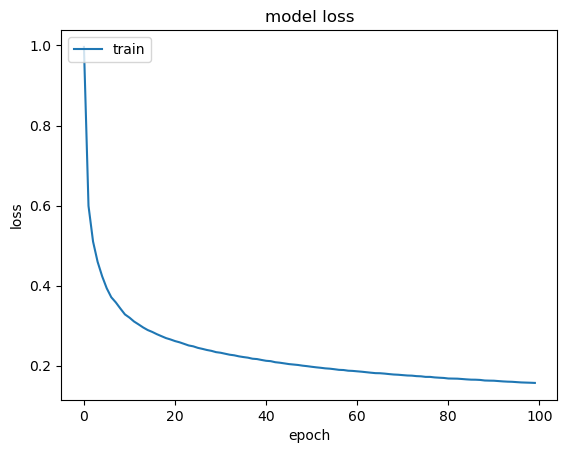

In [571]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [572]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

14913/14913 [==============================] - 19s 1ms/step - loss: 0.6487 - accuracy: 0.8895
Test score: 0.6486648321151733
Test accuracy: 0.8894635438919067


In [573]:
pred = model.predict(X_test)
pred=np.argmax(pred,axis=1)
y_test_arg=np.argmax(y_test,axis=1)
report=classification_report(y_test_arg, pred, digits=4)
print(report)

14913/14913 [==============================] - 11s 706us/step
              precision    recall  f1-score   support

           0     0.8831    0.8284    0.8549     10947
           1     0.8626    0.7613    0.8088     10978
           2     0.7427    0.8533    0.7942     10976
           3     0.8154    0.7613    0.7875     10974
           4     0.8273    0.6942    0.7549     10960
           5     0.7630    0.8032    0.7826     10977
           6     0.7685    0.8292    0.7977     10971
           7     0.7803    0.7824    0.7813     10973
           8     0.8505    0.9470    0.8962     10976
           9     0.7447    0.7533    0.7490     10973
          10     0.9470    0.9518    0.9494     10518
          11     0.9199    0.9560    0.9376     10519
          12     0.9813    0.9936    0.9874     10523
          13     0.8253    0.9243    0.8720     10521
          14     0.9861    0.9746    0.9803     10518
          15     0.8593    0.8603    0.8598     10519
          16     0.

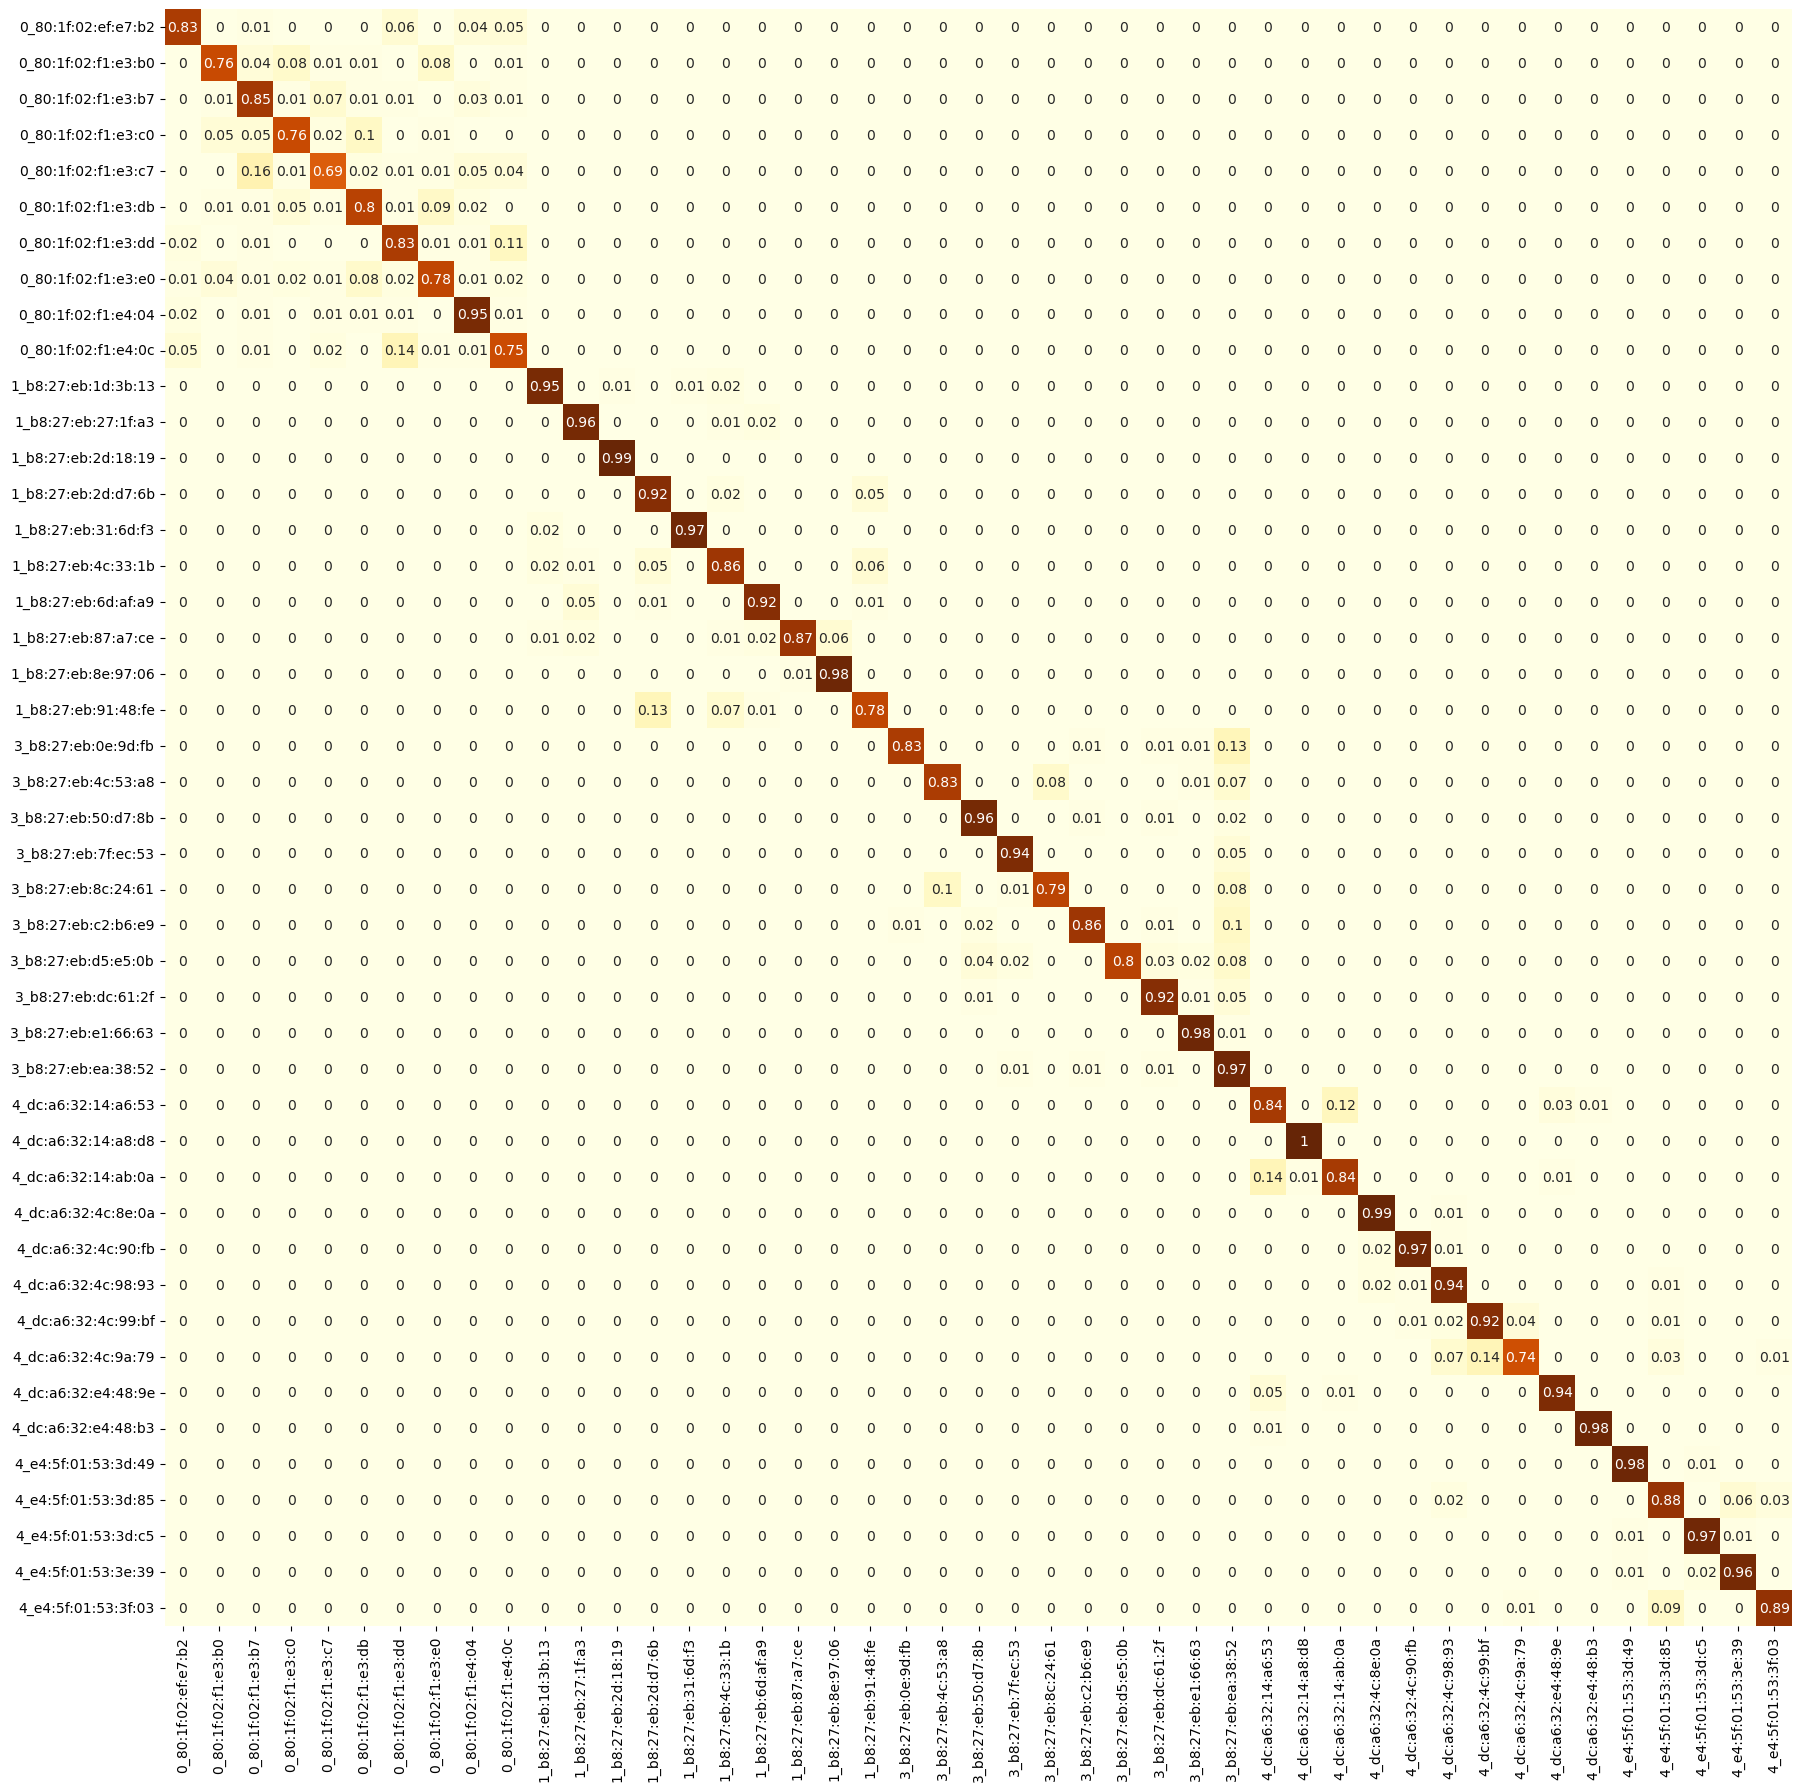

In [574]:
array = confusion_matrix(y_test_arg, pred)
array = array.astype('float') / array.sum(axis=1)[:, np.newaxis]
array = array.round(2)
df_cm = pd.DataFrame(array)
plt.figure(figsize = (21,21))
labels=list(df_y.unique())
labels.sort()
#fig, ax = plt.subplots(figsize=(35, 35))
sn.heatmap(df_cm, annot=True, cmap='YlOrBr', fmt='g',cbar=False,xticklabels=labels, yticklabels=labels)
#sn.set(font_scale=1.4)
plt.yticks(rotation=0)
#for label in (ax.get_xticklabels() + ax.get_yticklabels()):
#    label.set_fontsize(12)
#plt.rc('xtick', labelsize=50)
#plt.rc('ytick', labelsize=50)
plt.savefig("classification.pdf", bbox_inches = "tight")
plt.show()

In [223]:
####################################      1D-CNN      ####################################

In [224]:
n_timesteps=10 #100 

In [225]:
X_train = X_train[:(X_train.shape[0]//n_timesteps)*n_timesteps]
y_train = y_train[:(y_train.shape[0]//n_timesteps)*n_timesteps]
X_test = X_test[:(X_test.shape[0]//n_timesteps)*n_timesteps]
y_test = y_test[:(y_test.shape[0]//n_timesteps)*n_timesteps]

In [226]:
X_train_1dcnn=X_train.reshape((int(X_train.shape[0]/n_timesteps),n_timesteps, X_train.shape[1]))

In [227]:
Y_train_1dcnn=y_train.reshape((int(y_train.shape[0]/n_timesteps),n_timesteps, y_train.shape[1]))
Y_train_1dcnn=Y_train_1dcnn[:,0,:]

In [228]:
X_test_1dcnn=X_test.reshape((int(X_test.shape[0]/n_timesteps),n_timesteps, X_test.shape[1]))
Y_test_1dcnn=y_test.reshape((int(y_test.shape[0]/n_timesteps),n_timesteps, y_test.shape[1]))
Y_test_1dcnn=Y_test_1dcnn[:,0,:]

In [229]:
X_train_1dcnn.shape

(190890, 10, 215)

In [34]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_1dcnn.shape[1],X_train_1dcnn.shape[2])))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(Y_train_1dcnn.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

2022-11-18 22:09:11.692920: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-18 22:09:13.438882: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38404 MB memory:  -> device: 0, name: A100-PCIE-40GB, pci bus id: 0000:27:00.0, compute capability: 8.0


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 8, 64)             41344     
                                                                 
 conv1d_1 (Conv1D)           (None, 6, 64)             12352     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 3, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dense (Dense)               (None, 100)               19300     
                                                                 
 dense_1 (Dense)             (None, 45)                4545      
                                                        

In [522]:
es = EarlyStopping(monitor='loss', mode='min',patience=20)
mc = ModelCheckpoint('best_model_cnn.h5', monitor='loss', mode='min', save_best_only=True)

history = model.fit(X_train_1dcnn, Y_train_1dcnn, epochs=100, batch_size=64, verbose=1, callbacks=[es, mc])#, validation_data=(X_val, y_val), callbacks=[es, mc])

Epoch 1/100
2983/2983 [==============================] - 6s 2ms/step - loss: 1.3847 - accuracy: 0.4878
Epoch 2/100
2983/2983 [==============================] - 6s 2ms/step - loss: 0.7479 - accuracy: 0.7239
Epoch 3/100
2983/2983 [==============================] - 6s 2ms/step - loss: 0.5509 - accuracy: 0.7950
Epoch 4/100
2983/2983 [==============================] - 6s 2ms/step - loss: 0.4686 - accuracy: 0.8247
Epoch 5/100
2983/2983 [==============================] - 6s 2ms/step - loss: 0.4098 - accuracy: 0.8461
Epoch 6/100
2983/2983 [==============================] - 6s 2ms/step - loss: 0.3737 - accuracy: 0.8597
Epoch 7/100
2983/2983 [==============================] - 6s 2ms/step - loss: 0.3387 - accuracy: 0.8721
Epoch 8/100
2983/2983 [==============================] - 6s 2ms/step - loss: 0.3038 - accuracy: 0.8861
Epoch 9/100
2983/2983 [==============================] - 6s 2ms/step - loss: 0.2804 - accuracy: 0.8952
Epoch 10/100
2983/2983 [==============================] - 6s 2ms/step - l

In [550]:
model = load_model('best_model_cnn.h5')

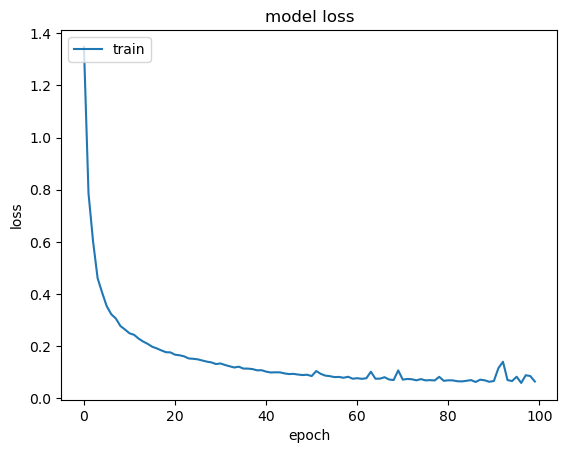

In [551]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [552]:
score, acc = model.evaluate(X_test_1dcnn, Y_test_1dcnn)
print('Test score:', score)
print('Test accuracy:', acc)

1492/1492 [==============================] - 2s 1ms/step - loss: 0.3921 - accuracy: 0.9428
Test score: 0.3920506238937378
Test accuracy: 0.9428331851959229


In [553]:
pred = model.predict(X_test_1dcnn)
pred=np.argmax(pred,axis=1)
y_test_arg=np.argmax(Y_test_1dcnn,axis=1)
report=classification_report(y_test_arg, pred, digits=4)
print(report)

1492/1492 [==============================] - 1s 896us/step
              precision    recall  f1-score   support

           0     0.9480    0.9671    0.9575      1094
           1     0.9843    0.8596    0.9178      1097
           2     0.9250    0.9654    0.9447      1098
           3     0.9603    0.8807    0.9188      1098
           4     0.9585    0.8641    0.9088      1096
           5     0.8841    0.9517    0.9167      1098
           6     0.7539    0.9290    0.8323      1098
           7     0.9084    0.9216    0.9149      1097
           8     0.9783    0.9426    0.9601      1098
           9     0.8103    0.7705    0.7899      1098
          10     0.9878    0.9981    0.9929      1052
          11     0.9442    0.9819    0.9627      1052
          12     0.9990    0.9810    0.9899      1052
          13     0.9169    0.9012    0.9090      1053
          14     0.9915    0.9990    0.9953      1052
          15     0.8290    0.9638    0.8913      1051
          16     0.991

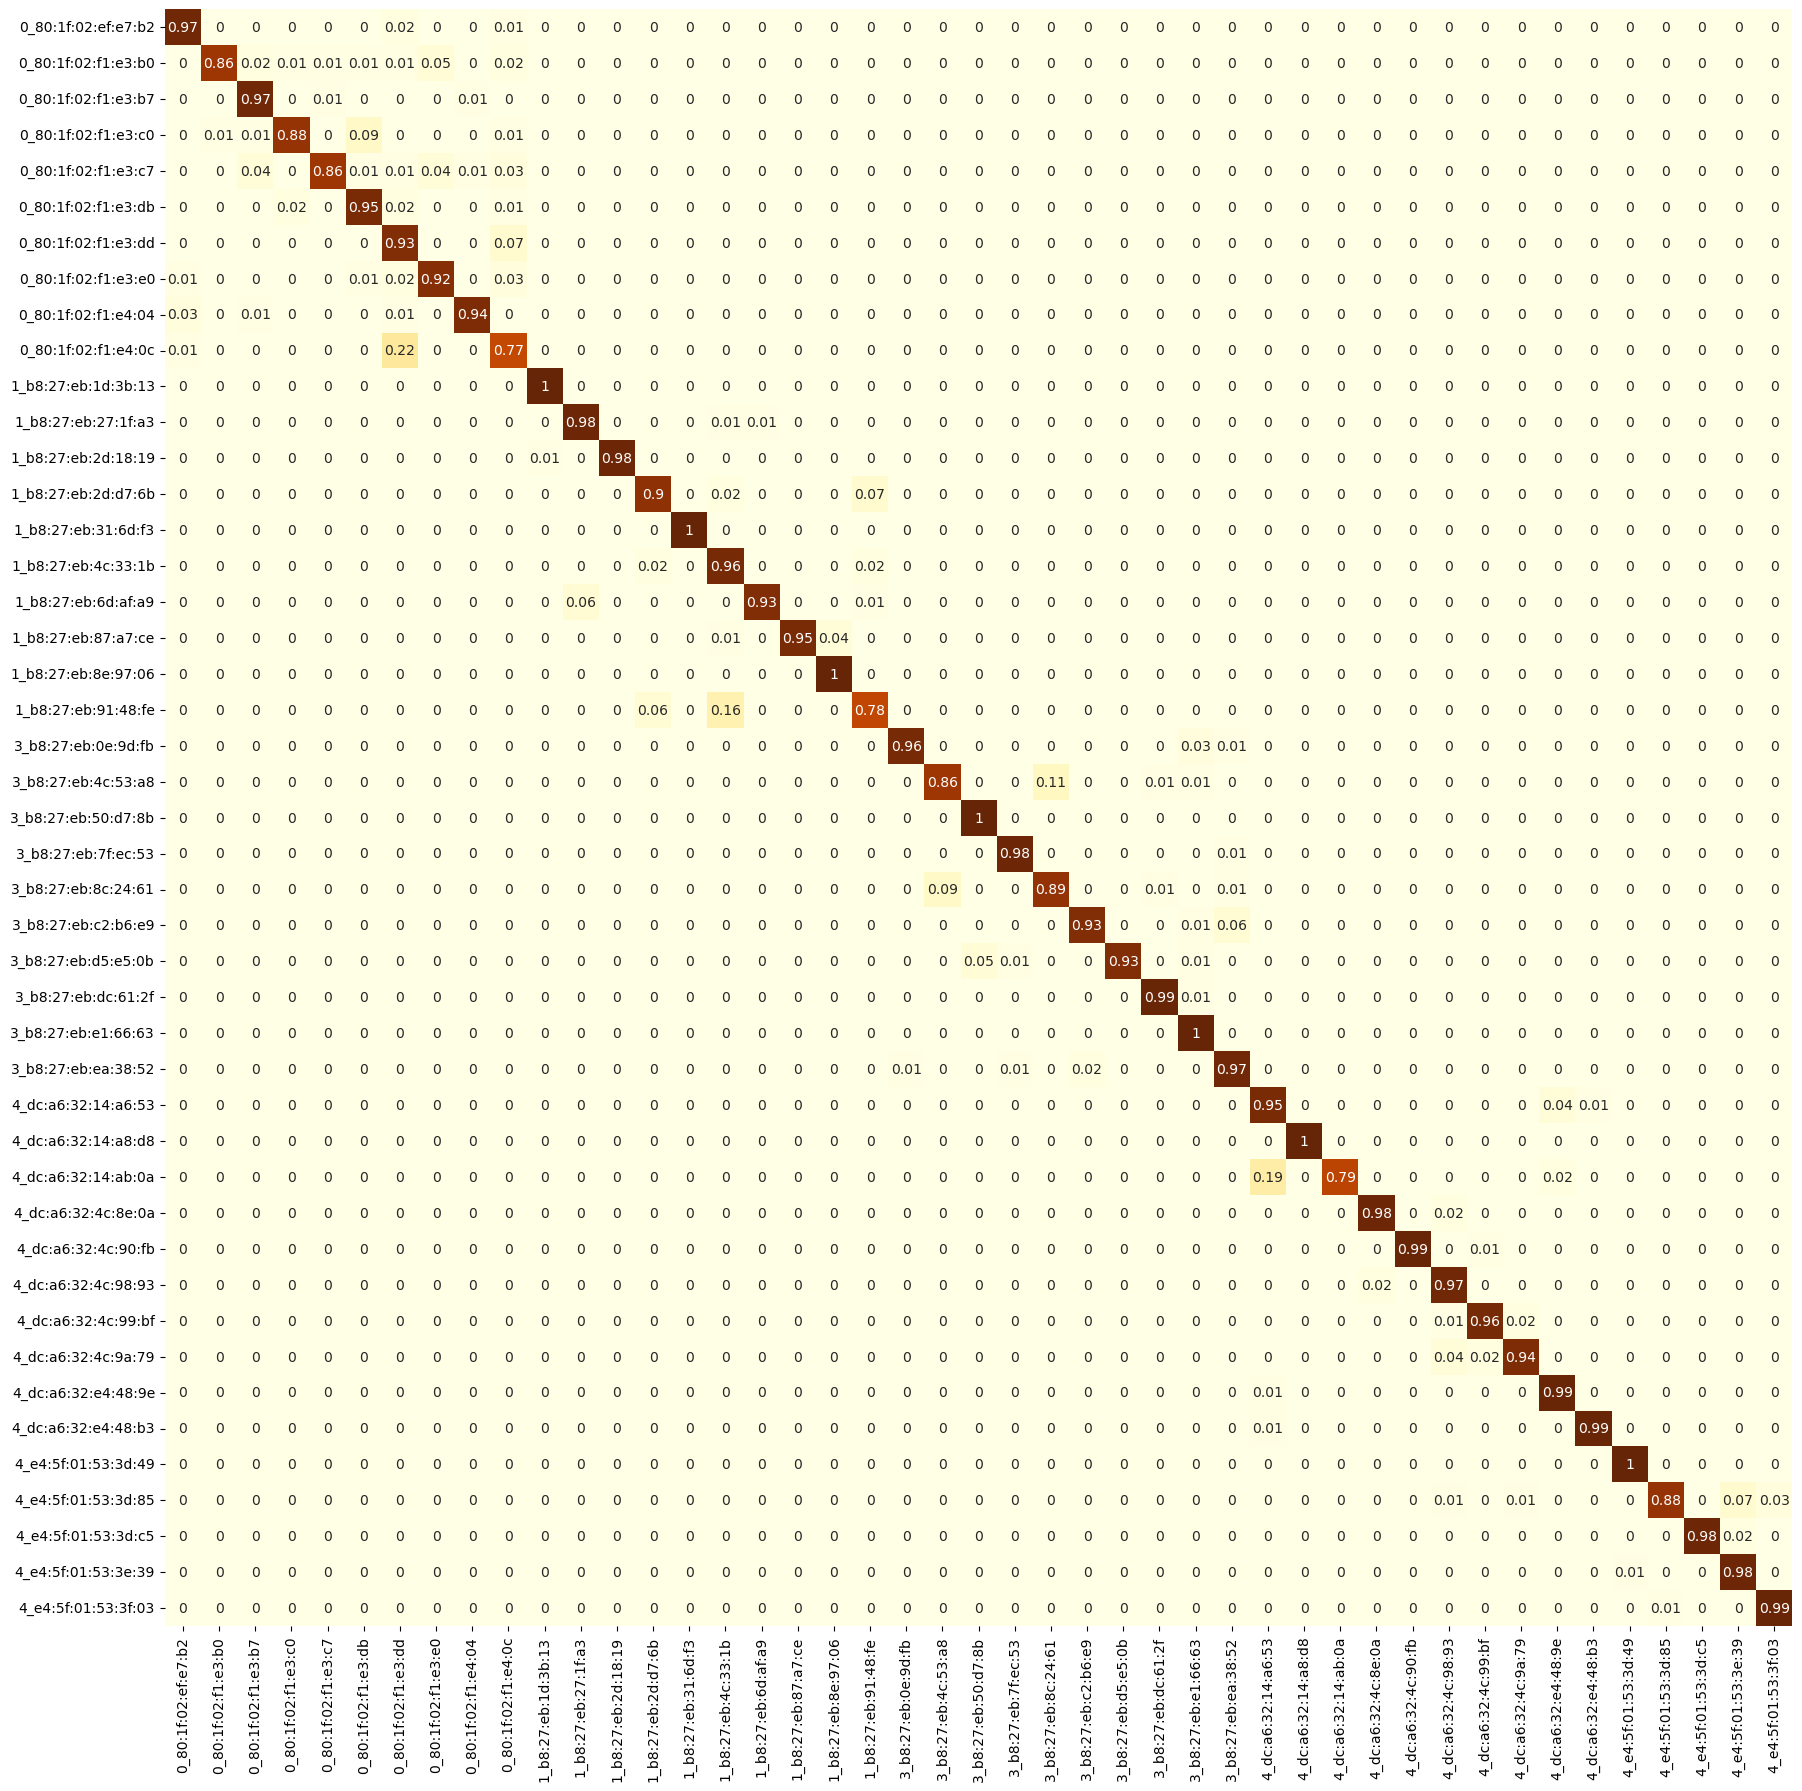

In [527]:
array = confusion_matrix(y_test_arg, pred)
array = array.astype('float') / array.sum(axis=1)[:, np.newaxis]
array = array.round(2)
df_cm = pd.DataFrame(array)
plt.figure(figsize = (21,21))
labels=list(df_y.unique())
labels.sort()
#fig, ax = plt.subplots(figsize=(35, 35))
sn.heatmap(df_cm, annot=True, cmap='YlOrBr', fmt='g',cbar=False,xticklabels=labels, yticklabels=labels)
#sn.set(font_scale=1.4)
plt.yticks(rotation=0)
#for label in (ax.get_xticklabels() + ax.get_yticklabels()):
#    label.set_fontsize(12)
#plt.rc('xtick', labelsize=50)
#plt.rc('ytick', labelsize=50)
plt.savefig("classification_1cnn.pdf", bbox_inches = "tight")
plt.show()

In [ ]:
####################################     LSTM      ####################################

In [504]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train_1dcnn.shape[1],X_train_1dcnn.shape[2]),return_sequences=True, activation='relu'))
model.add(LSTM(64,return_sequences=False, activation='relu'))#True = many to many
model.add(Dense(100, activation='relu'))
model.add(Dense(Y_train_1dcnn.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 10, 128)           176128    
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_160 (Dense)           (None, 100)               6500      
                                                                 
 dense_161 (Dense)           (None, 45)                4545      
                                                                 
Total params: 236,581
Trainable params: 236,581
Non-trainable params: 0
_________________________________________________________________
None


In [505]:
es = EarlyStopping(monitor='loss', mode='min',patience=20)
mc = ModelCheckpoint('best_model_lstm.h5', monitor='loss', mode='min', save_best_only=True)

history = model.fit(X_train_1dcnn, Y_train_1dcnn, epochs=100, batch_size=64, verbose=1, callbacks=[es, mc])#, validation_data=(X_val, y_val), callbacks=[es, mc])

Epoch 1/100
2983/2983 [==============================] - 61s 20ms/step - loss: 1.2687 - accuracy: 0.5251
Epoch 2/100
2983/2983 [==============================] - 60s 20ms/step - loss: 0.6424 - accuracy: 0.7572
Epoch 3/100
2983/2983 [==============================] - 60s 20ms/step - loss: 0.4679 - accuracy: 0.8222
Epoch 4/100
2983/2983 [==============================] - 60s 20ms/step - loss: 0.3772 - accuracy: 0.8566
Epoch 5/100
2983/2983 [==============================] - 60s 20ms/step - loss: 0.3193 - accuracy: 0.8797
Epoch 6/100
2983/2983 [==============================] - 60s 20ms/step - loss: 0.2810 - accuracy: 0.8942
Epoch 7/100
2983/2983 [==============================] - 60s 20ms/step - loss: 0.2546 - accuracy: 0.9034
Epoch 8/100
2983/2983 [==============================] - 60s 20ms/step - loss: 0.2313 - accuracy: 0.9115
Epoch 9/100
2983/2983 [==============================] - 60s 20ms/step - loss: 0.2020 - accuracy: 0.9219
Epoch 10/100
2983/2983 [==============================]

In [547]:
model = load_model('best_model_lstm.h5')

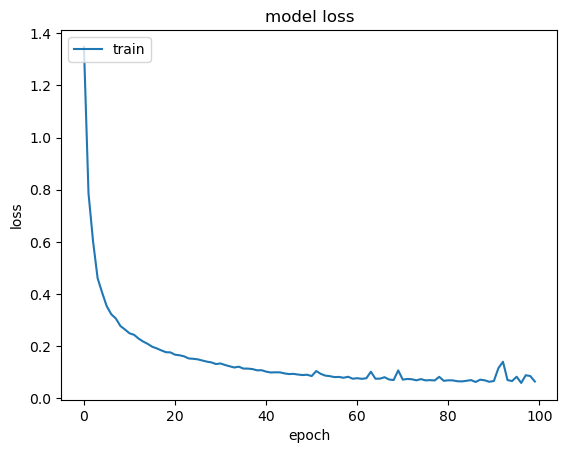

In [548]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [549]:
pred = model.predict(X_test_1dcnn)
pred=np.argmax(pred,axis=1)
y_test_arg=np.argmax(Y_test_1dcnn,axis=1)
report=classification_report(y_test_arg, pred, digits=4)
print(report)

1492/1492 [==============================] - 6s 4ms/step
              precision    recall  f1-score   support

           0     0.9416    0.9735    0.9573      1094
           1     0.9815    0.6773    0.8015      1097
           2     0.7594    0.9226    0.8331      1098
           3     0.7965    0.9016    0.8458      1098
           4     0.9638    0.7783    0.8612      1096
           5     0.7102    0.9863    0.8258      1098
           6     0.8608    0.9745    0.9141      1098
           7     0.9323    0.6782    0.7852      1097
           8     0.9096    0.9991    0.9523      1098
           9     0.9725    0.7732    0.8615      1098
          10     0.9990    0.9297    0.9631      1052
          11     0.9486    0.9990    0.9731      1052
          12     0.9953    1.0000    0.9976      1052
          13     0.9322    0.9535    0.9427      1053
          14     0.9375    0.9981    0.9669      1052
          15     0.8885    0.9781    0.9312      1051
          16     0.9940 

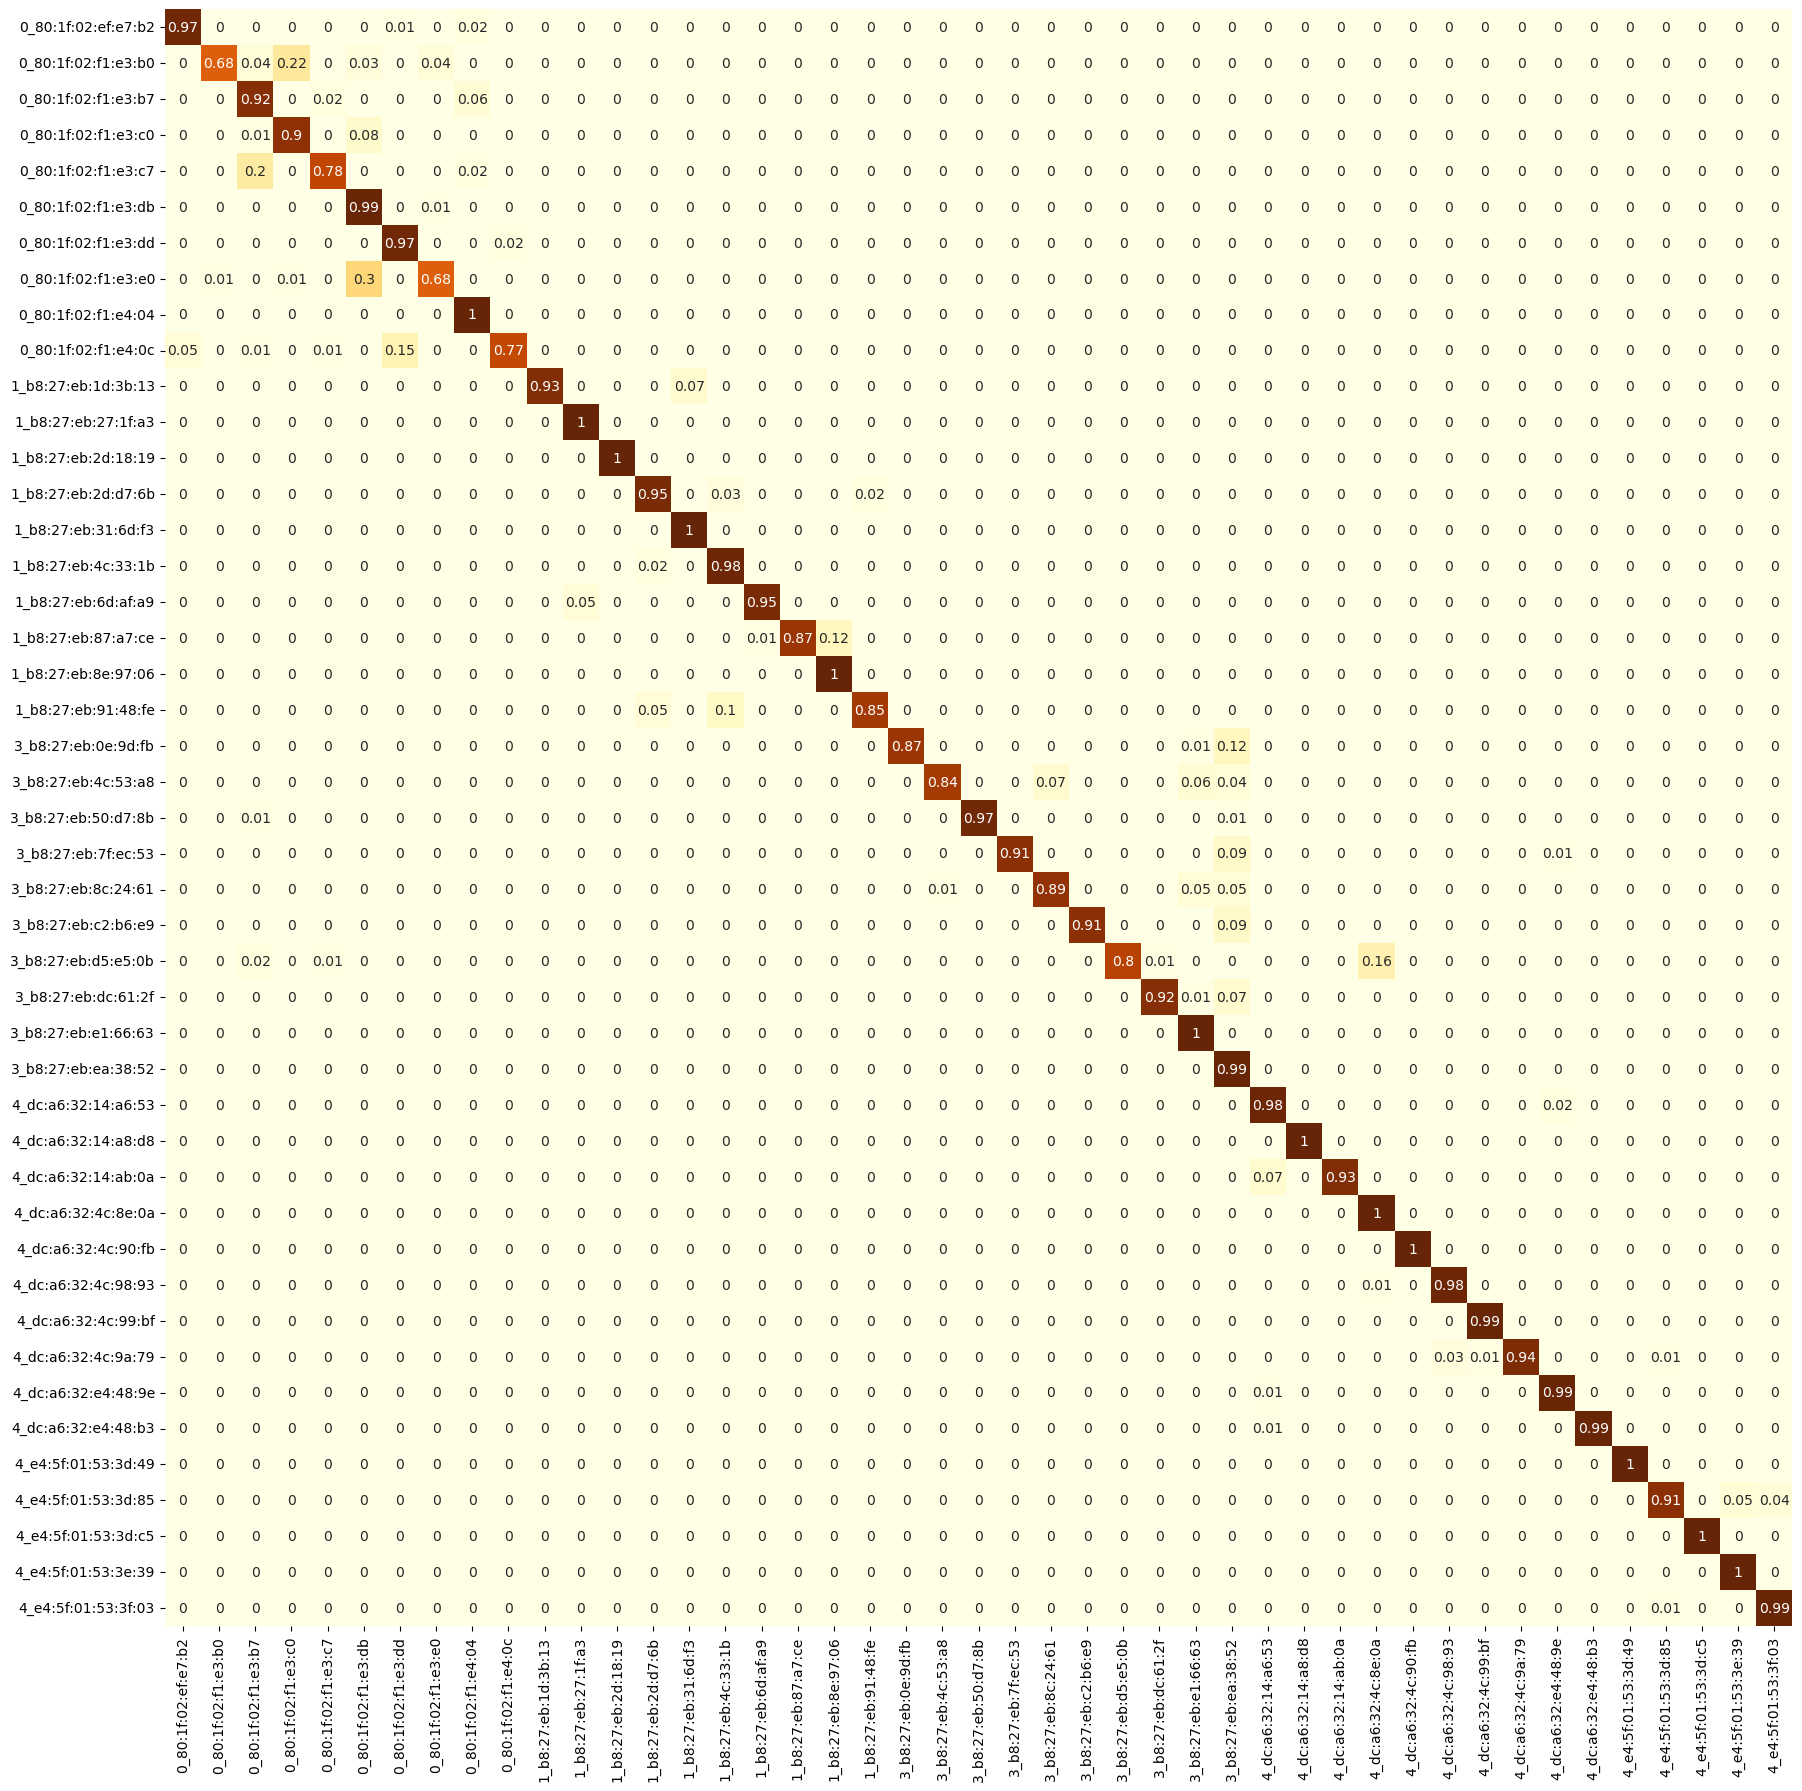

In [509]:
array = confusion_matrix(y_test_arg, pred)
array = array.astype('float') / array.sum(axis=1)[:, np.newaxis]
array = array.round(2)
df_cm = pd.DataFrame(array)
plt.figure(figsize = (21,21))
labels=list(df_y.unique())
labels.sort()
#fig, ax = plt.subplots(figsize=(35, 35))
sn.heatmap(df_cm, annot=True, cmap='YlOrBr', fmt='g',cbar=False,xticklabels=labels, yticklabels=labels)
#sn.set(font_scale=1.4)
plt.yticks(rotation=0)
#for label in (ax.get_xticklabels() + ax.get_yticklabels()):
#    label.set_fontsize(12)
#plt.rc('xtick', labelsize=50)
#plt.rc('ytick', labelsize=50)
plt.savefig("classification_lstm.pdf", bbox_inches = "tight")
plt.show()

In [465]:
####################################     Multi-head 1D-CNN + LSTM    ####################################

In [565]:
# fit and evaluate a model
def generate_model(trainX, trainy):
    verbose, epochs, batch_size = 1, 100, 64
    n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
    # head 1
    inputs1 = Input(shape=(n_timesteps,n_features))
    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs1)
    drop1 = Conv1D(filters=64, kernel_size=3, activation='relu')(conv1)
    pool1 = MaxPooling1D(pool_size=2)(drop1)
    flat1 = Flatten()(pool1)
    # head 2
    inputs2 = Input(shape=(n_timesteps,n_features))
    conv2 = Conv1D(filters=64, kernel_size=5, activation='relu')(inputs2)
    drop2 = Conv1D(filters=64, kernel_size=5, activation='relu')(conv2)
    pool2 = MaxPooling1D(pool_size=2)(drop2)
    flat2 = Flatten()(pool2)
    # head 3
    inputs3 = Input(shape=(n_timesteps,n_features))
    conv3 = LSTM(64,return_sequences=True, activation='relu')(inputs3)
    drop3 = LSTM(64,return_sequences=False, activation='relu')(conv3)
    #pool3 = MaxPooling1D(pool_size=2)(drop3)
    flat3 = Flatten()(drop3)
    # merge
    merged = concatenate([flat1, flat2, flat3])
    # interpretation
    dense1 = Dense(100, activation='relu')(merged)
    outputs = Dense(n_outputs, activation='softmax')(dense1)
    model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
    # save a plot of the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit network
    mc = ModelCheckpoint('best_model_mcnn.h5', monitor='loss', mode='min', save_best_only=True)
    model.fit([trainX,trainX,trainX], trainy, epochs=epochs, batch_size=batch_size, verbose=verbose, callbacks=[mc])
    model = load_model('best_model_mcnn.h5')
    
    return model

In [566]:
model=generate_model(X_train_1dcnn,Y_train_1dcnn)

Epoch 1/100
2983/2983 [==============================] - 66s 21ms/step - loss: 1.2093 - accuracy: 0.5522
Epoch 2/100
2983/2983 [==============================] - 63s 21ms/step - loss: 0.5698 - accuracy: 0.7861
Epoch 3/100
2983/2983 [==============================] - 63s 21ms/step - loss: 0.4498 - accuracy: 0.8319
Epoch 4/100
2983/2983 [==============================] - 63s 21ms/step - loss: 0.3620 - accuracy: 0.8666
Epoch 5/100
2983/2983 [==============================] - 63s 21ms/step - loss: 0.3115 - accuracy: 0.8849
Epoch 6/100
2983/2983 [==============================] - 63s 21ms/step - loss: 0.2604 - accuracy: 0.9044
Epoch 7/100
2983/2983 [==============================] - 63s 21ms/step - loss: 0.2399 - accuracy: 0.9116
Epoch 8/100
2983/2983 [==============================] - 63s 21ms/step - loss: 0.2121 - accuracy: 0.9217
Epoch 9/100
2983/2983 [==============================] - 63s 21ms/step - loss: 0.1983 - accuracy: 0.9270
Epoch 10/100
2983/2983 [==============================]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2983/2983 [==============================] - 63s 21ms/step - loss: 0.0510 - accuracy: 0.9822
Epoch 63/100
1872/2983 [=================>............] - ETA: 23s - loss: 0.0468 - accuracy: 0.9835

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2983/2983 [==============================] - 63s 21ms/step - loss: 0.0470 - accuracy: 0.9835
Epoch 65/100
2983/2983 [==============================] - 63s 21ms/step - loss: 0.0487 - accuracy: 0.9834
Epoch 66/100
1924/2983 [==================>...........] - ETA: 22s - loss: 0.0444 - accuracy: 0.9850

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2983/2983 [==============================] - 63s 21ms/step - loss: 0.5240 - accuracy: 0.9781
Epoch 80/100
 835/2983 [=======>......................] - ETA: 45s - loss: 0.1015 - accuracy: 0.9641

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2983/2983 [==============================] - 63s 21ms/step - loss: 0.0593 - accuracy: 0.9798
Epoch 82/100
2983/2983 [==============================] - 63s 21ms/step - loss: 0.0447 - accuracy: 0.9842
Epoch 83/100
 868/2983 [=======>......................] - ETA: 44s - loss: 0.0393 - accuracy: 0.9858

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2983/2983 [==============================] - 63s 21ms/step - loss: 0.0402 - accuracy: 0.9864
Epoch 96/100
1507/2983 [==============>...............] - ETA: 31s - loss: 0.0333 - accuracy: 0.9879

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2983/2983 [==============================] - 63s 21ms/step - loss: 0.0395 - accuracy: 0.9868
Epoch 98/100
2983/2983 [==============================] - 63s 21ms/step - loss: 0.0376 - accuracy: 0.9873
Epoch 99/100
2827/2983 [===========================>..] - ETA: 3s - loss: 0.0429 - accuracy: 0.9855

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [567]:
_, accuracy = model.evaluate([X_test_1dcnn,X_test_1dcnn,X_test_1dcnn], Y_test_1dcnn, verbose=1)
    
pred = model.predict([X_test_1dcnn,X_test_1dcnn,X_test_1dcnn])
pred=np.argmax(pred,axis=1)
y_test_arg=np.argmax(Y_test_1dcnn,axis=1)
report=classification_report(y_test_arg, pred, digits=4)
print(report)

1492/1492 [==============================] - 6s 4ms/step
              precision    recall  f1-score   support

           0     0.9520    0.9790    0.9653      1094
           1     0.9713    0.9243    0.9472      1097
           2     0.9849    0.9508    0.9676      1098
           3     0.9755    0.8689    0.9191      1098
           4     0.9234    0.9462    0.9347      1096
           5     0.8744    0.9699    0.9197      1098
           6     0.8501    0.9144    0.8811      1098
           7     0.9099    0.9754    0.9415      1097
           8     0.9818    0.9344    0.9575      1098
           9     0.8844    0.8497    0.8667      1098
          10     0.9972    0.9990    0.9981      1052
          11     0.9559    0.9886    0.9720      1052
          12     0.9981    0.9971    0.9976      1052
          13     0.9670    0.8623    0.9116      1053
          14     0.9981    0.9990    0.9986      1052
          15     0.8947    0.9382    0.9159      1051
          16     0.9853 

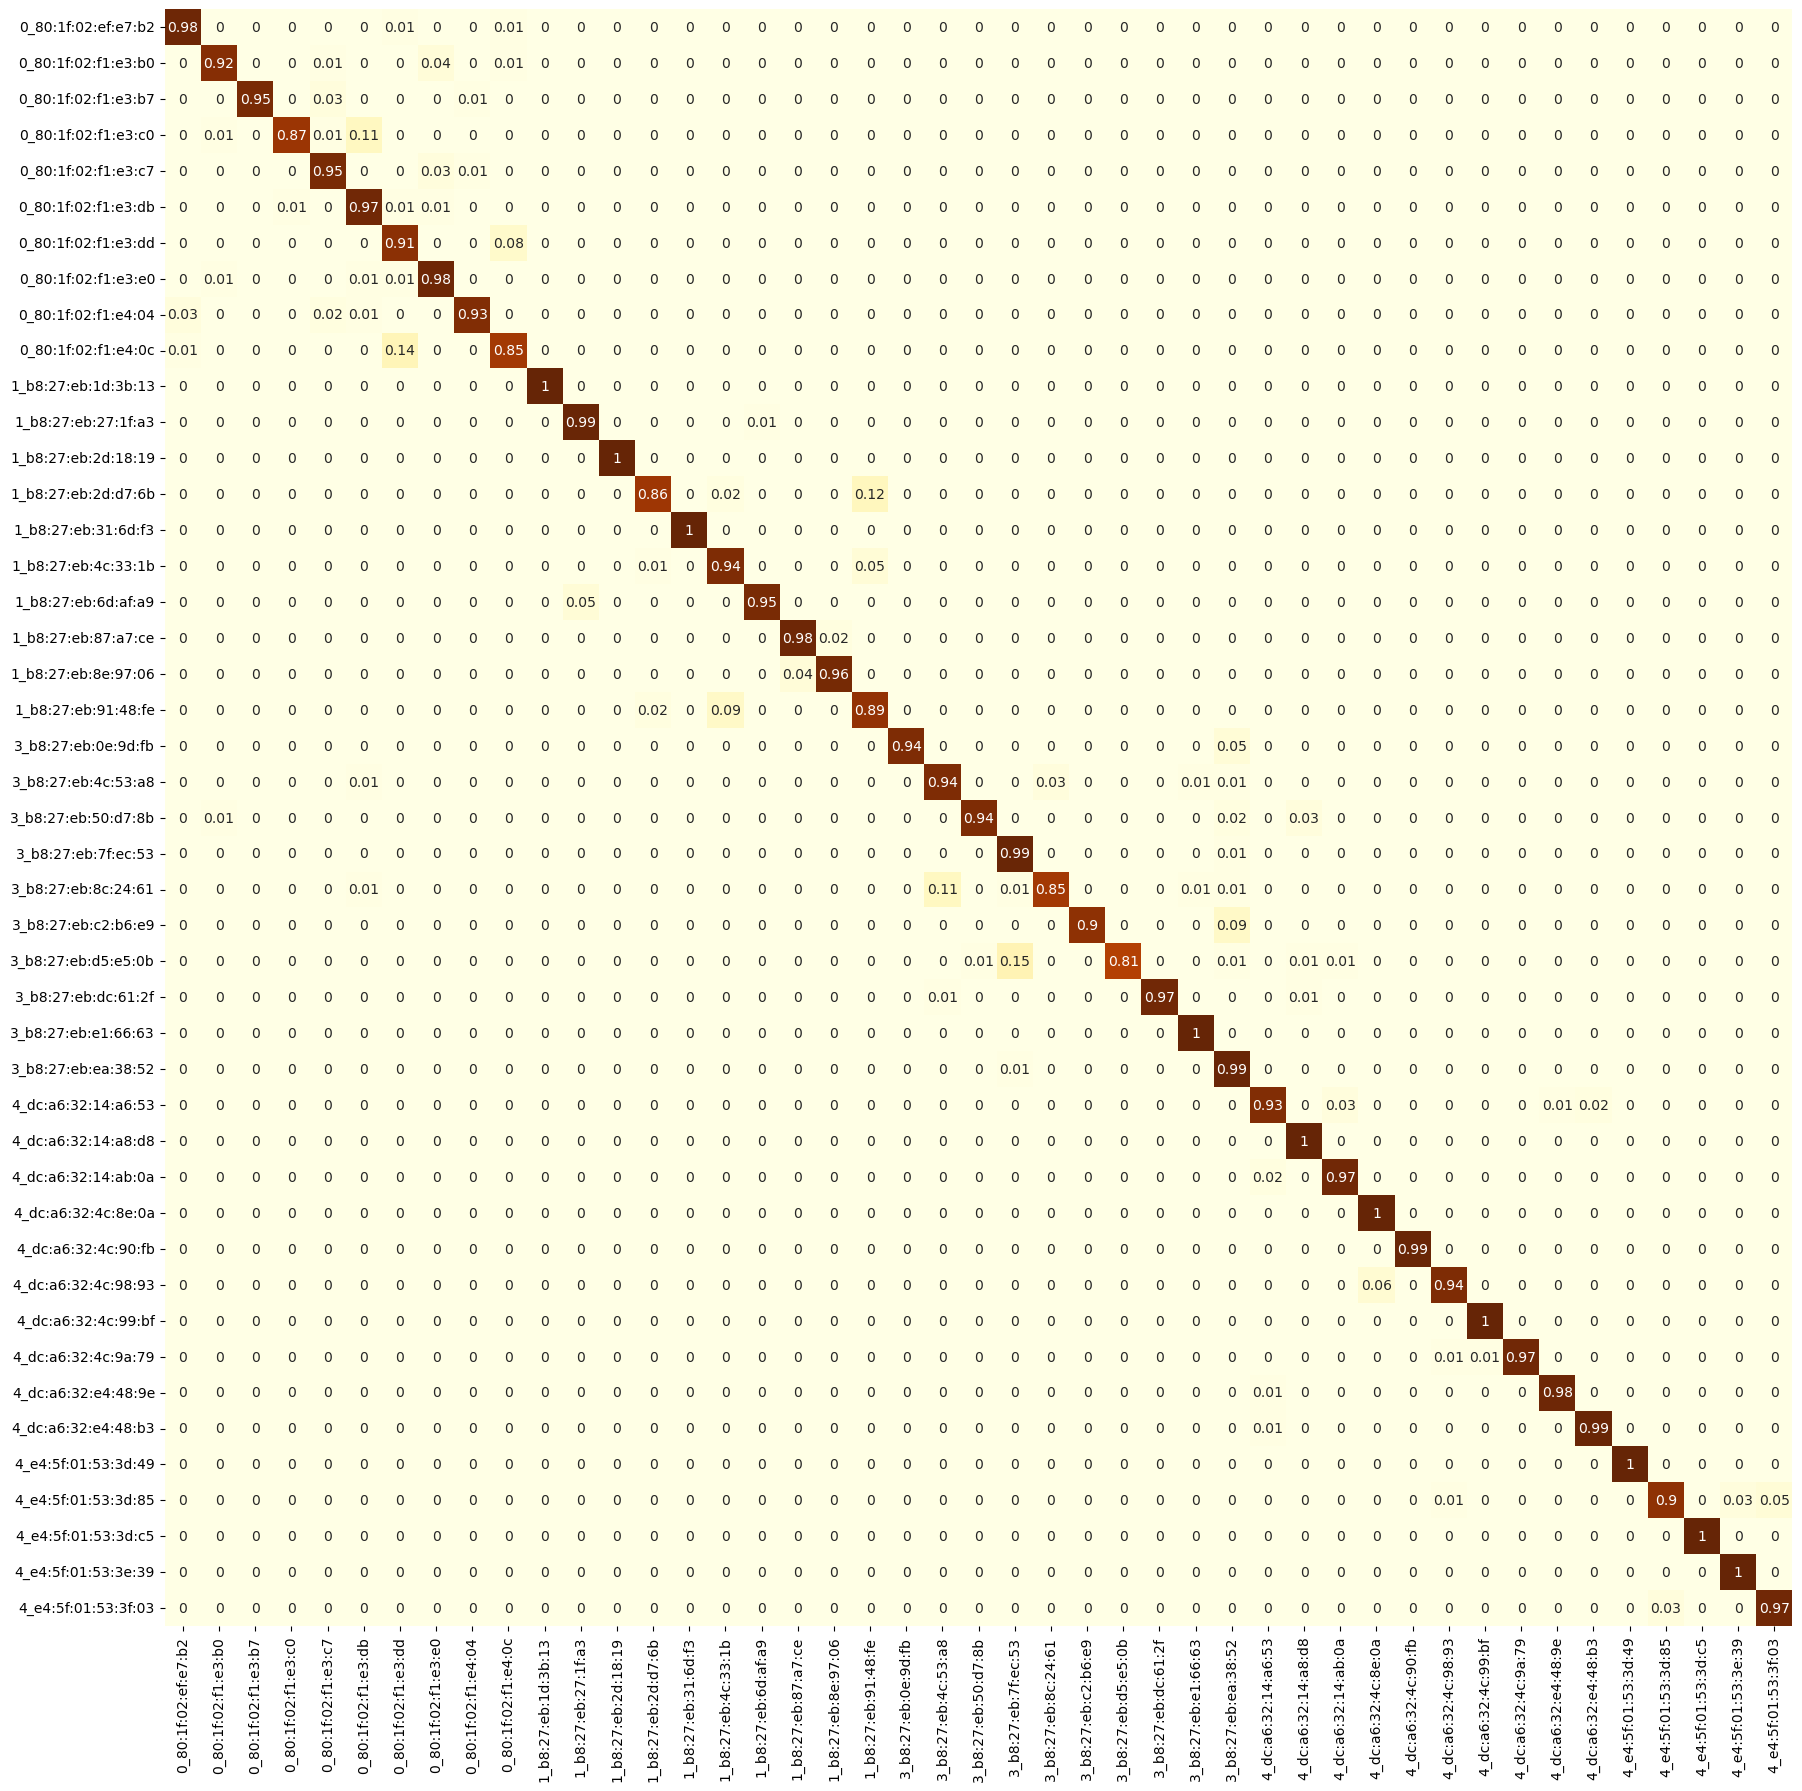

In [568]:
array = confusion_matrix(y_test_arg, pred)
array = array.astype('float') / array.sum(axis=1)[:, np.newaxis]
array = array.round(2)
df_cm = pd.DataFrame(array)
plt.figure(figsize = (21,21))
labels=list(df_y.unique())
labels.sort()
#fig, ax = plt.subplots(figsize=(35, 35))
sn.heatmap(df_cm, annot=True, cmap='YlOrBr', fmt='g',cbar=False,xticklabels=labels, yticklabels=labels)
#sn.set(font_scale=1.4)
plt.yticks(rotation=0)
#for label in (ax.get_xticklabels() + ax.get_yticklabels()):
#    label.set_fontsize(12)
#plt.rc('xtick', labelsize=50)
#plt.rc('ytick', labelsize=50)
plt.savefig("classification_m1cnn.pdf", bbox_inches = "tight")
plt.show()

In [46]:
model = Sequential()
model.add(LSTM(64,return_sequences=True, activation='relu', input_shape=(X_train_1dcnn.shape[1],X_train_1dcnn.shape[2])))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))#True = many to many
#model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(Y_train_1dcnn.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            71680     
                                                                 
 conv1d (Conv1D)             (None, 8, 64)             12352     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 4, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 100)               25700     
                                                                 
 dense_1 (Dense)             (None, 45)                4545      
                                                        

In [560]:
es = EarlyStopping(monitor='loss', mode='min',patience=20)
mc = ModelCheckpoint('best_model_cnnlstm.h5', monitor='loss', mode='min', save_best_only=True)

history = model.fit(X_train_1dcnn, Y_train_1dcnn, epochs=100, batch_size=64, verbose=1, callbacks=[es, mc])#, validation_data=(X_val, y_val), callbacks=[es, mc])


Epoch 1/100
2983/2983 [==============================] - 32s 10ms/step - loss: 1.2590 - accuracy: 0.5362
Epoch 2/100
2983/2983 [==============================] - 31s 10ms/step - loss: 0.6401 - accuracy: 0.7623
Epoch 3/100
2983/2983 [==============================] - 31s 10ms/step - loss: 0.4453 - accuracy: 0.8325
Epoch 4/100
2983/2983 [==============================] - 31s 10ms/step - loss: 0.3639 - accuracy: 0.8615
Epoch 5/100
2983/2983 [==============================] - 31s 10ms/step - loss: 0.3085 - accuracy: 0.8830
Epoch 6/100
2983/2983 [==============================] - 31s 10ms/step - loss: 0.2705 - accuracy: 0.8964
Epoch 7/100
2983/2983 [==============================] - 31s 10ms/step - loss: 0.2382 - accuracy: 0.9078
Epoch 8/100
2983/2983 [==============================] - 31s 10ms/step - loss: 0.2198 - accuracy: 0.9148
Epoch 9/100
2983/2983 [==============================] - 31s 10ms/step - loss: 0.2098 - accuracy: 0.9192
Epoch 10/100
2983/2983 [==============================]

In [38]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [39]:
model = load_model('best_model_cnnlstm.h5')

In [40]:
pred = model.predict(X_test_1dcnn)
pred=np.argmax(pred,axis=1)
y_test_arg=np.argmax(Y_test_1dcnn,axis=1)
report=classification_report(y_test_arg, pred, digits=4)
print(report)

2022-11-18 11:07:37.295066: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2022-11-18 11:07:37.930784: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8101


  16/1492 [..............................] - ETA: 5s     

2022-11-18 11:07:38.777629: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1492/1492 [==============================] - 7s 3ms/step
              precision    recall  f1-score   support

           0     0.9891    0.9891    0.9891      1096
           1     0.9864    0.9225    0.9534      1097
           2     0.9745    0.9727    0.9736      1098
           3     0.9105    0.9171    0.9138      1098
           4     0.9736    0.9745    0.9740      1096
           5     0.8295    0.9745    0.8961      1098
           6     0.8546    0.9262    0.8890      1098
           7     0.9607    0.9818    0.9711      1097
           8     0.9954    0.9936    0.9945      1098
           9     0.9075    0.8397    0.8723      1098
          10     0.9952    0.9943    0.9948      1052
          11     0.9676    0.9943    0.9808      1052
          12     0.9990    0.9981    0.9986      1052
          13     0.9382    0.9373    0.9378      1053
          14     0.9952    0.9952    0.9952      1052
          15     0.9467    0.9458    0.9462      1051
          16     0.9893 

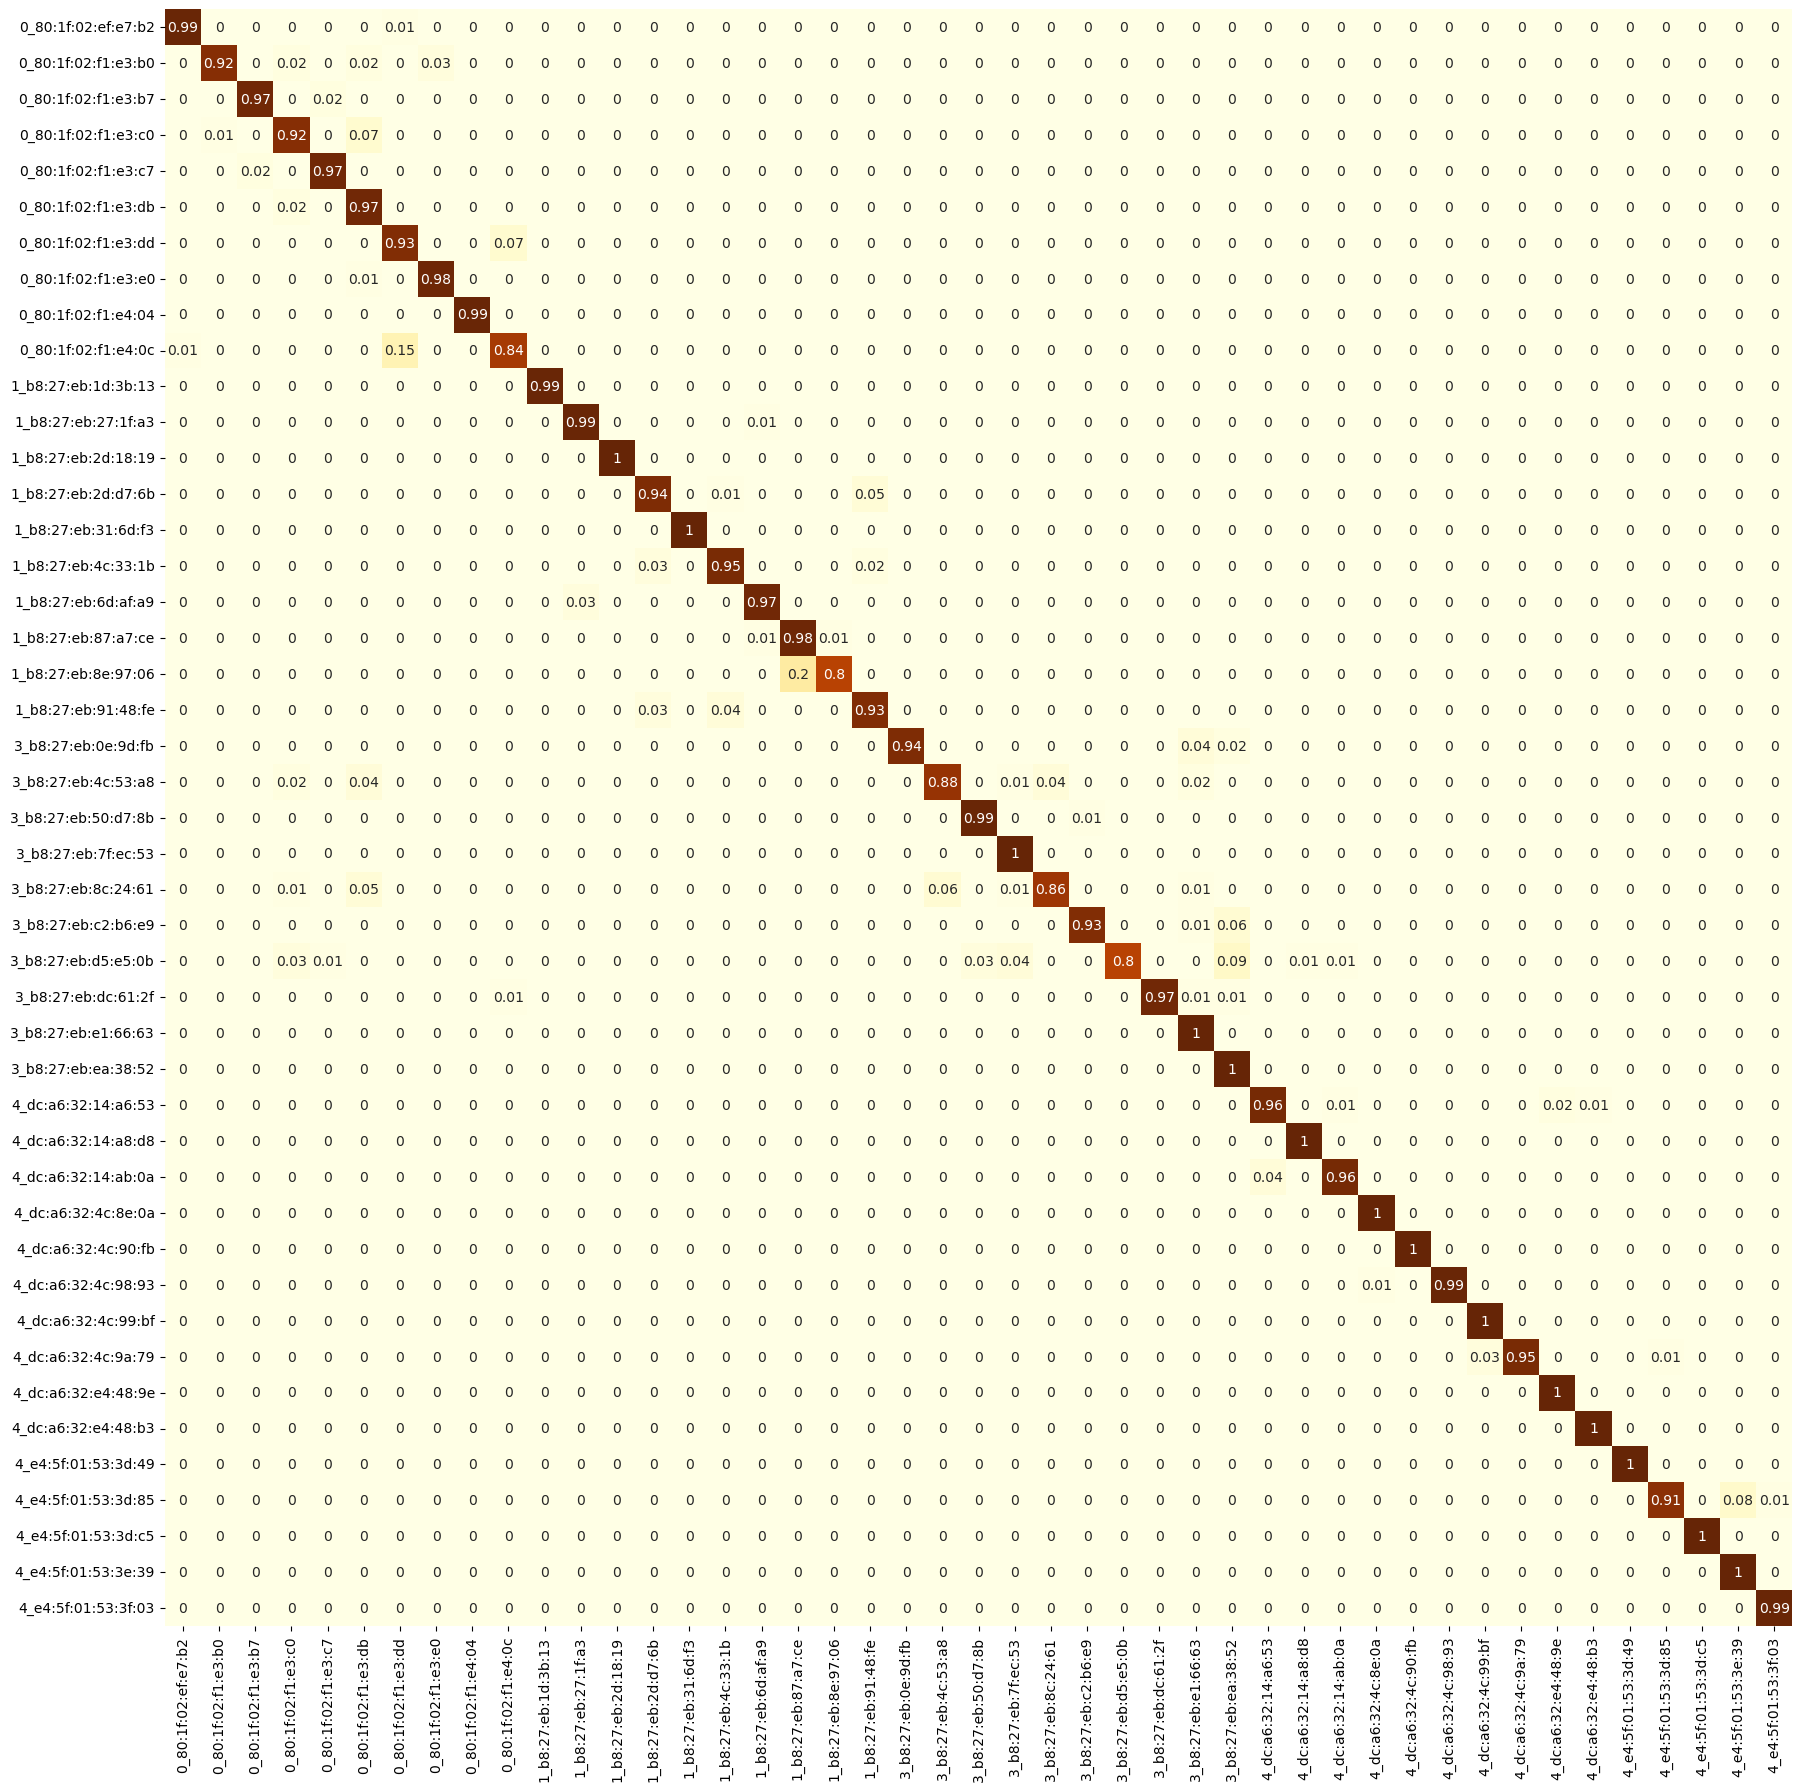

In [41]:
array = confusion_matrix(y_test_arg, pred)
array = array.astype('float') / array.sum(axis=1)[:, np.newaxis]
array = array.round(2)
df_cm = pd.DataFrame(array)
plt.figure(figsize = (21,21))
labels=list(df_y.unique())
labels.sort()
#fig, ax = plt.subplots(figsize=(35, 35))
sn.heatmap(df_cm, annot=True, cmap='YlOrBr', fmt='g',cbar=False,xticklabels=labels, yticklabels=labels)
#sn.set(font_scale=1.4)
plt.yticks(rotation=0)
#for label in (ax.get_xticklabels() + ax.get_yticklabels()):
#    label.set_fontsize(12)
#plt.rc('xtick', labelsize=50)
#plt.rc('ytick', labelsize=50)
plt.savefig("classification_cnn_lstm.pdf", bbox_inches = "tight")
plt.show()